### Dataset Visualizations

Dataset used: [Metro dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

##### Features:
* holiday: US National Holiday + Minnesota State Holiday
* temp: average Temperature in Kelvin
* rain_1h: mm or Rain
* snow_1h: mm of Snow
* clouds_all: percentage of cloud cover
* weather_main: short text descr. of weather
* weather_description: longer text descr. of weather
* date_time: datetime
* traffic_volume: westbound Traffic Volume (Ground Truth)

In [10]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# Read data from file
metro_wmain = pd.read_csv("../data/metro/metro_weather_main.csv") 
metro_wdescr = pd.read_csv("../data/metro/metro_weather_descr.csv") 
metro_wall = pd.read_csv("../data/metro/metro_weather_all.csv") 


#### Dataset Exploration:

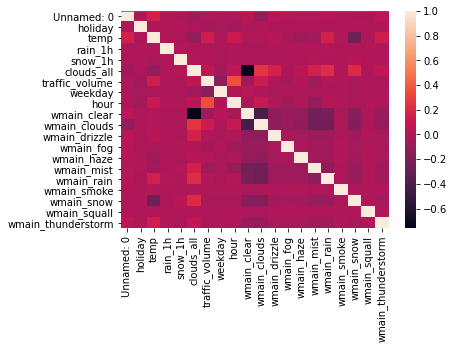

In [67]:
# distribution of target attribute "quality"
sns.distplot(metro_wmain['traffic_volume']) # kde=0 if kernel density estimation is not necessary

# Scatterplot-Matrix visualises correlation of every possible combination of attributes, 
# especially the correlation of the input attributes and the target attribute quality is of importance
# sns.pairplot(metro_wmain)

# heatmap visualises the correlation of each pair of values
sns.heatmap(metro_wmain.corr())

#### Modeling:

In [16]:
def linear(dataset):
    train, test = train_test_split(dataset, test_size=0.2)
    # Training Model
    x_train = train.drop('traffic_volume', axis=1)
    y_train = train['traffic_volume']

    model = LinearRegression()
    model.fit(x_train, y_train)

    r_sq = model.score(x_train, y_train)

    # Testing
    x_test = test.drop('traffic_volume', axis=1)
    y_test = test['traffic_volume']
    y_pred = model.predict(x_test)
    return(r_sq, y_test, y_pred)

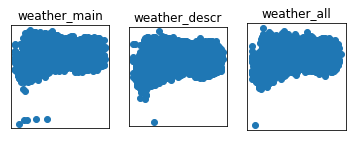

In [62]:
sq_m, y_test_m, y_pred_m = linear(metro_wmain)
sq_d, y_test_d, y_pred_d = linear(metro_wdescr)
sq_a, y_test_a, y_pred_a = linear(metro_wall)

# Plot outputs
fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.scatter(y_test_m, y_pred_m)
ax1.set_title('weather_main')
ax1.set_aspect('equal')
plt.xticks(())
plt.yticks(())

ax2 = fig.add_subplot(132)
ax2.scatter(y_test_d, y_pred_d)
ax2.set_title('weather_descr')
ax2.set_aspect('equal')
plt.xticks(())
plt.yticks(())

ax3 = fig.add_subplot(133)
ax3.scatter(y_test_a, y_pred_a)
ax3.set_title('weather_all')
ax3.set_aspect('equal')
plt.xticks(())
plt.yticks(())

plt.show()